In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# df = pd.read_csv("../results/rssi_n10_10d_adr.csv")
# df = pd.read_csv("../results/rssi_n10_10d_noadr.csv")
df = pd.read_csv("../results/rssi_berlin_gw100m.csv")
df

,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:06:21-60307)",Unnamed: 1,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:06:21-60307).1",Unnamed: 3,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:06:21-60307).2",Unnamed: 5,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:06:21-60307).3",Unnamed: 7,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:06:21-60307).4",Unnamed: 9,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:06:21-60307).5",Unnamed: 11,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:06:21-60307).6",Unnamed: 13,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:06:21-60307).7",Unnamed: 15,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:06:21-60307).8",Unnamed: 17,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:06:21-60307).9",Unnamed: 19
0,552.770622,-68.091531,788.923274,-59.561581,797.596636,-61.309579,900.282520,-65.711172,924.945265,-64.524241,978.728559,-78.528436,1257.652893,-69.358372,1861.326345,-89.128868,1880.686186,-70.226904,1953.267471,-66.890968
1,553.970622,-68.091531,790.123274,-59.561581,798.796636,-61.309579,901.482520,-65.711172,926.145265,-64.524241,979.928559,-78.528436,1258.852893,-69.358372,1862.526345,-89.128868,1881.886186,-70.226904,1954.467471,-66.890968
2,1592.129922,-77.480671,1542.797385,-56.416668,2586.284300,-65.058596,2418.018497,-67.390143,1461.710986,-59.686544,1941.309498,-71.404674,1833.385300,-79.561943,2575.109938,-77.996297,2327.305648,-68.172642,2279.807886,-77.546225
3,2568.993996,-78.711226,2600.623798,-73.844140,3230.389010,-61.668661,3436.677227,-68.847791,2850.753673,-55.688582,2774.153017,-70.391223,2919.654680,-81.052951,3462.971349,-71.384934,3543.814302,-71.782105,2787.008007,-73.163818
4,4025.812555,-79.140653,4708.071403,-70.869476,6115.000760,-64.976991,3624.196178,-63.829591,4690.486458,-59.232573,6246.688496,-75.397544,4921.641176,-65.103181,4993.802575,-72.744250,4680.410797,-83.360146,3088.573923,-75.353704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,656685.199112,-71.561300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,656939.049883,-71.748144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,658519.339038,-70.856599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660851.073130,-67.042343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# rssi_berlin_gw100m.csv
locations = [[-304.52156108273766, 371.6134448465055, 23], [-490.069254154322, 218.16444607650294, 23], [-195.2116354190786, 147.33327780419074, 19], [-826.016524055903, 31.35696931360557, 22], [-364.93909694406386, 433.4378240604358, 23], [-578.9059389930152, 63.82588789400968, 19], [-534.809727985328, 268.8693326263983, 23], [-381.3320065556517, 146.66610824442768, 23], [-834.2487712408622, 196.25904552752453, 19], [-823.3678880051875, 745.5619831521817, 23]]
distances = [196.54021877190638, 248.3063961763793, 416.31656638949653, 559.8917242822065, 128.54954241058886, 413.2375111160414, 211.11106397548843, 327.0139482529865, 456.1623342888391, 468.22358052881714]
initial_node_order = ['node0', 'node1', 'node2', 'node3', 'node4', 'node5', 'node6', 'node7', 'node8', 'node9']
conditions = pd.DataFrame(distances, index=initial_node_order)
conditions

,0
node0,196.540219
node1,248.306396
node2,416.316566
node3,559.891724
node4,128.549542
node5,413.237511
node6,211.111064
node7,327.013948
node8,456.162334
node9,468.223581


In [33]:
df_count = pd.read_csv("../results/count_berlin_gw100m.csv")
df_count

,run,repetition,module,name,value
0,General-0-20230501-22:06:21-60307,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 0,492
1,General-0-20230501-22:06:21-60307,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 1,498
2,General-0-20230501-22:06:21-60307,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 2,503
3,General-0-20230501-22:06:21-60307,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 3,506
4,General-0-20230501-22:06:21-60307,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 4,518
5,General-0-20230501-22:06:21-60307,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 5,511
6,General-0-20230501-22:06:21-60307,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 6,526
7,General-0-20230501-22:06:21-60307,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 7,528
8,General-0-20230501-22:06:21-60307,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 8,530
9,General-0-20230501-22:06:21-60307,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 9,535


In [34]:
node_order = []
for i in ["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]:
    node_num = df_count.loc[df_count["value"] == df[i].count()-1].index[0]
    node_order.append("node"+str(node_num))
print(node_order)

['node8', 'node6', 'node0', 'node1', 'node4', 'node9', 'node2', 'node3', 'node7', 'node5']


In [35]:
rssi_values = df[["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]]
rssi_values.set_axis(node_order, axis='columns', inplace=True)
print(rssi_values.head())

       node8      node6      node0      node1      node4      node9  \
0 -68.091531 -59.561581 -61.309579 -65.711172 -64.524241 -78.528436   
1 -68.091531 -59.561581 -61.309579 -65.711172 -64.524241 -78.528436   
2 -77.480671 -56.416668 -65.058596 -67.390143 -59.686544 -71.404674   
3 -78.711226 -73.844140 -61.668661 -68.847791 -55.688582 -70.391223   
4 -79.140653 -70.869476 -64.976991 -63.829591 -59.232573 -75.397544   

       node2      node3      node7      node5  
0 -69.358372 -89.128868 -70.226904 -66.890968  
1 -69.358372 -89.128868 -70.226904 -66.890968  
2 -79.561943 -77.996297 -68.172642 -77.546225  
3 -81.052951 -71.384934 -71.782105 -73.163818  
4 -65.103181 -72.744250 -83.360146 -75.353704  


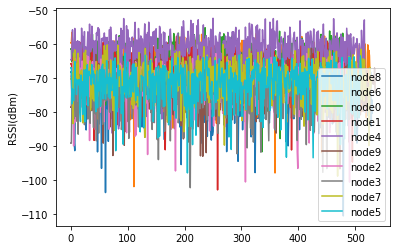

In [55]:
# rssi_values.plot.line()
plt.figure(facecolor="white")
plt.plot(rssi_values)
plt.legend(rssi_values)
plt.ylabel("RSSI(dBm)")
plt.show()

<AxesSubplot:ylabel='Frequency'>

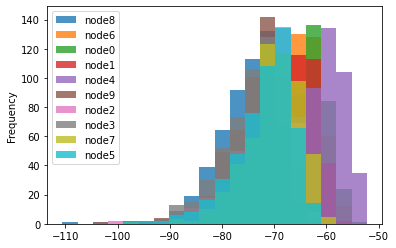

In [54]:
rssi_values.plot.hist(bins=20, alpha=0.8)

<AxesSubplot:>

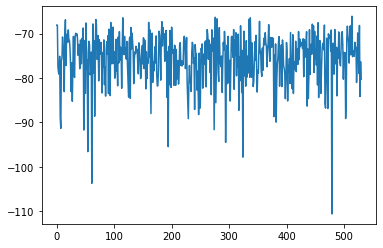

In [38]:
rssi_values["node8"].plot.line()

<AxesSubplot:ylabel='Frequency'>

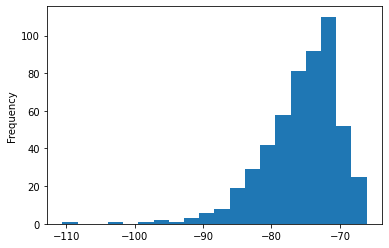

In [39]:
rssi_values["node8"].plot.hist(bins=20)

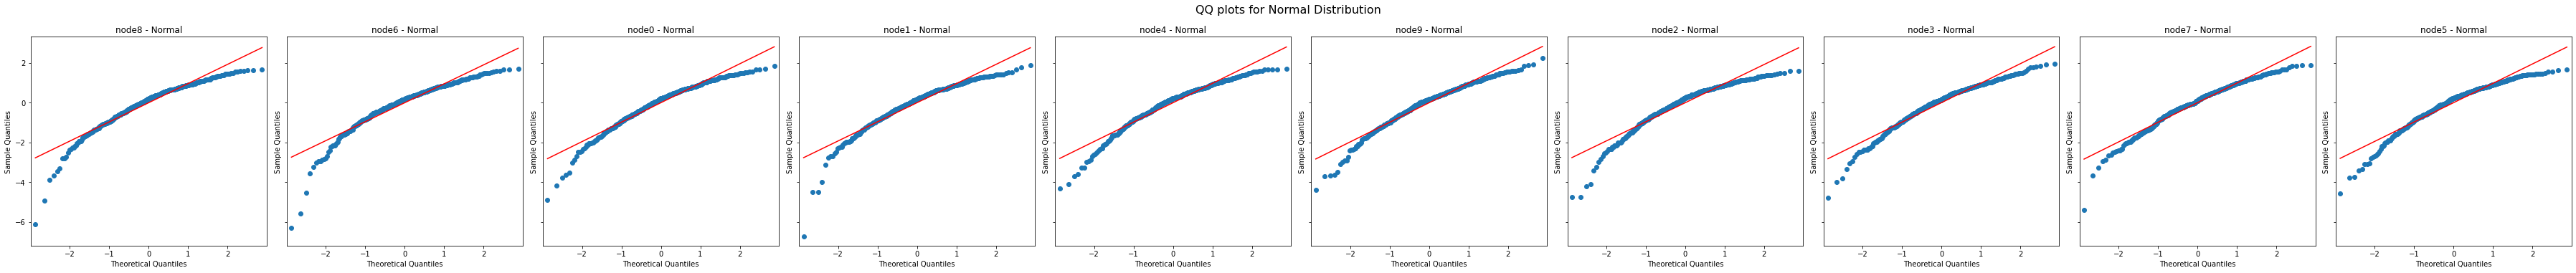

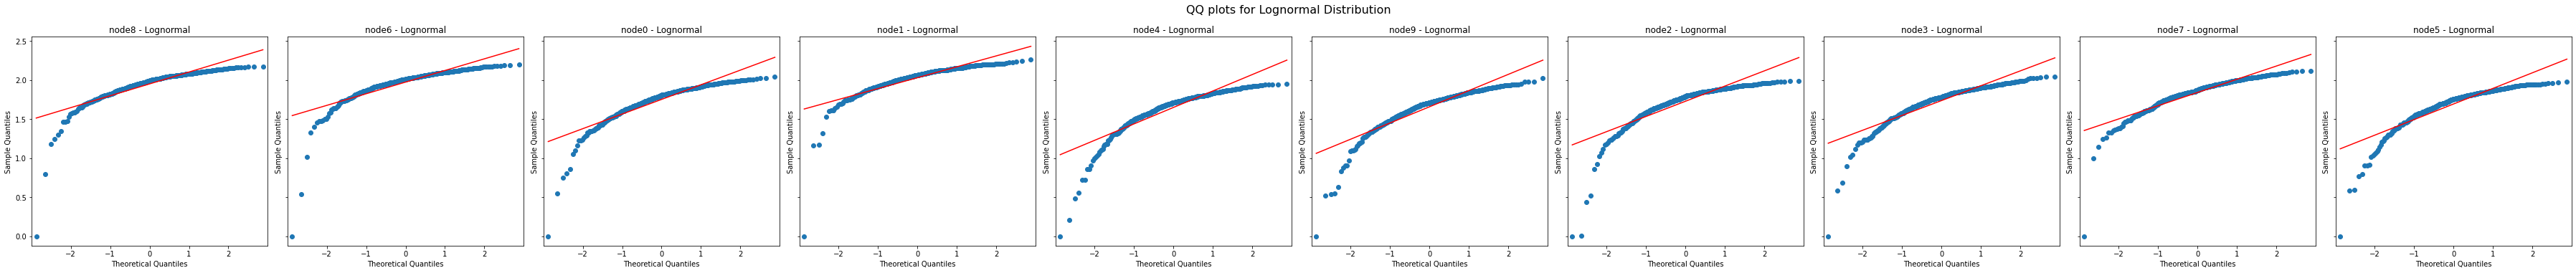

In [40]:
def plot_qq_statsmodels_horizontal(data, distribution_type):
    fig, ax = plt.subplots(1, len(data.columns), figsize=(5 * len(data.columns), 5), sharey=True)
    for idx, column in enumerate(data.columns):
        if distribution_type == "normal":
            sm.qqplot(data[column], line="r", ax=ax[idx])
        elif distribution_type == "lognormal":
            sm.qqplot(np.log(data[column] - data[column].min() + 1), line="r", ax=ax[idx])
        ax[idx].set_title(f"{column} - {distribution_type.capitalize()}")

    plt.tight_layout()
    plt.suptitle(f"QQ plots for {distribution_type.capitalize()} Distribution", fontsize=16, y=1.05)
    plt.show()


cleaned_rssi_values = rssi_values.dropna()
scaler = StandardScaler()
normalized_rssi_values = pd.DataFrame(scaler.fit_transform(cleaned_rssi_values), columns=cleaned_rssi_values.columns)


plot_qq_statsmodels_horizontal(normalized_rssi_values, "normal")
plot_qq_statsmodels_horizontal(normalized_rssi_values, "lognormal")


- norm dist because there is no multipath  
- the reason left end is above the line is that we cannot detect signal below -130dBm  

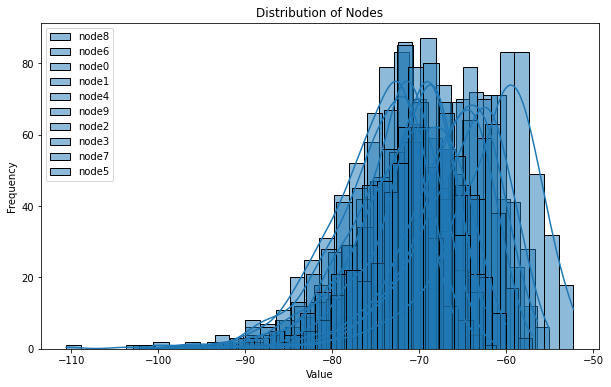

In [41]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create histograms or KDE plots for each node
for column in rssi_values.columns:
    sns.histplot(rssi_values[column], kde=True, ax=ax, label=column)

# Customize the plot
ax.set_title("Distribution of Nodes")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.legend()

# Display the plot
plt.show()

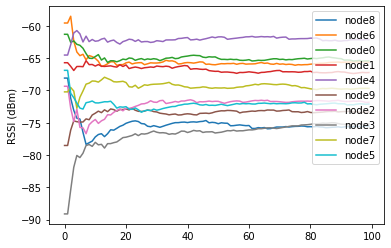

In [52]:
# Calculate the cumulative sum for each column
cumulative_sum = rssi_values.cumsum()

# Calculate the cumulative count for each column
cumulative_count = rssi_values.apply(lambda x: (x.notna().cumsum()))

# Compute the average value for each element by dividing cumulative sum by cumulative count
average_df = cumulative_sum / cumulative_count

# Display the new DataFrame with the average values
plt.figure(facecolor="white")
plt.plot(average_df[:100])
plt.legend(average_df,loc='upper right')
plt.ylabel("RSSI (dBm)")
plt.show()
# average_df.plot.line()

         distance       rssi
node0  196.540219 -65.169211
node1  248.306396 -67.149377
node2  416.316566 -72.201113
node3  559.891724 -74.924912
node4  128.549542 -61.850778
node5  413.237511 -72.031349
node6  211.111064 -66.243520
node7  327.013948 -70.180655
node8  456.162334 -75.672063
node9  468.223581 -73.173382


<AxesSubplot:xlabel='distance', ylabel='rssi'>

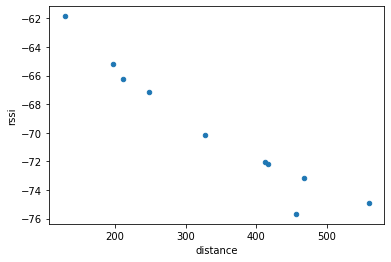

In [43]:
mean_rssi = pd.DataFrame(rssi_values.mean())
rssi_distance = pd.merge(conditions, mean_rssi, left_index=True, right_index=True)
rssi_distance.columns = ["distance", "rssi"]
print(rssi_distance)
rssi_distance.plot.scatter(x="distance",y="rssi")

{'node0': 196.54021877190638, 'node1': 248.3063961763793, 'node2': 416.31656638949653, 'node3': 559.8917242822065, 'node4': 128.54954241058886, 'node5': 413.2375111160414, 'node6': 211.11106397548843, 'node7': 327.0139482529865, 'node8': 456.1623342888391, 'node9': 468.22358052881714}
node8
node6
node0
node1
node4
node9
node2
node3
node7
node5


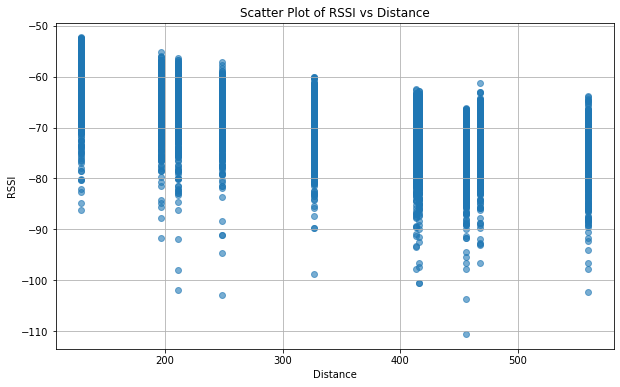

In [44]:
# Create a mapping from node names to their corresponding distance
node_to_distance = conditions.squeeze().to_dict()
print(node_to_distance)

# Create an empty array to store x (distance) and y (rssi) values for the scatter plot
x_values = []
y_values = []

# Iterate through the columns (nodes) in rssi_values
for node in rssi_values.columns:
    # Get the distance for the current node
    print(node)
    distance = node_to_distance[node]
    
    # Get the rssi values for the current node
    rssi_values_node = rssi_values[node].dropna()
    
    # Append the distance value to x_values as many times as there are rssi values
    x_values.extend([distance] * len(rssi_values_node))
    
    # Append the rssi values to y_values
    y_values.extend(rssi_values_node)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.6)

# Add labels and title
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Scatter Plot of RSSI vs Distance")

# Optionally, you can add a grid for better readability
plt.grid(True)

# Finally, display the plot
plt.show()



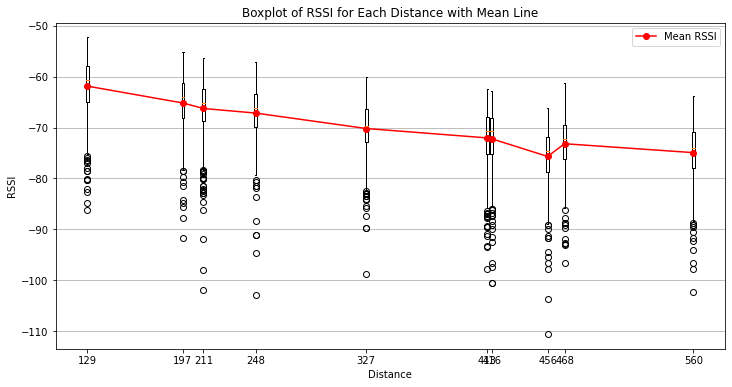

In [46]:
# Create a list of node names
node_names = rssi_values.columns

# Create a mapping from node names to their corresponding distance
node_to_distance = conditions.squeeze().to_dict()

# Create a list of distances corresponding to the node names
distances_list = [node_to_distance[node] for node in node_names]

# Initialize an empty list to store the data for box plots
box_plot_data = []

# Add the RSSI values for each node to the box_plot_data list
for node in node_names:
    box_plot_data.append(rssi_values[node].dropna().tolist())

# Create custom ticks and labels for the x-axis
xticks = distances_list
xticklabels = [int(round(dist)) for dist in xticks]

# Calculate the mean RSSI for each node
mean_rssi_values = [np.mean(rssi) for rssi in box_plot_data]

# Sort the data by distances
sorted_data = sorted(zip(distances_list, box_plot_data, mean_rssi_values))
sorted_distances, sorted_box_plot_data, sorted_mean_rssi_values = zip(*sorted_data)

# Create a box plot for each node with distance on the x-axis
plt.figure(figsize=(12, 6), facecolor="white")
plt.boxplot(sorted_box_plot_data, positions=sorted_distances, widths=2)

# Set custom ticks and labels for the x-axis
sorted_xticks = sorted(xticks)
sorted_xticklabels = [str(int(round(d))) for d in sorted_xticks]
plt.xticks(sorted_xticks, sorted_xticklabels)

# Add labels and title
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Boxplot of RSSI for Each Distance with Mean Line")

# Optionally, you can add a grid for better readability
plt.grid(axis='y')

# Plot a line connecting the mean RSSI values for each node
plt.plot(sorted_distances, sorted_mean_rssi_values, marker='o', linestyle='-', color='red', label='Mean RSSI')

# Add a legend to the plot
plt.legend()

# Finally, display the plot
plt.show()




# prediction